# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rayhan Gunaningrat
- **Email:** rayhan212@gmail.com
- **ID Dicoding:** rayhan_gun

## Menentukan Pertanyaan Bisnis

- Bagaimana pola waktu pengiriman pesanan memengaruhi tingkat kepuasan pelanggan (berdasarkan ulasan pelanggan)?
- Apakah terdapat hubungan antara kategori produk dengan metode pembayaran yang paling sering digunakan?

## Import Semua Packages/Library yang Digunakan

In [29]:
!pip install pandas numpy matplotlib seaborn streamlit pipreqsnb -q

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
!pipreqsnb . --force

Exception occurred while working on file /content/drive/MyDrive/Colab Notebooks/ML1.ipynb, cell 15/28
Traceback (most recent call last):
  File "/usr/local/bin/pipreqsnb", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pipreqsnb/pipreqsnb.py", line 130, in main
    raise e
  File "/usr/local/lib/python3.11/dist-packages/pipreqsnb/pipreqsnb.py", line 126, in main
    imports += get_import_string_from_source(source)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pipreqsnb/pipreqsnb.py", line 26, in get_import_string_from_source
    tree = ast.parse(source)
           ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<unknown>", line 4
    print(t[0]=10)
          ^^^^^
SyntaxError: expression cannot contain assignment, perhaps you meant "=="?


In [35]:
print(t[0] == 10)

True


## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load datasets
order_items = pd.read_csv('/content/drive/MyDrive/e-commerce_dataset/order_items_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/e-commerce_dataset/order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/e-commerce_dataset/orders_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/e-commerce_dataset/order_payments_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/e-commerce_dataset/customers_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/e-commerce_dataset/products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/e-commerce_dataset/sellers_dataset.csv')
product_category_translation = pd.read_csv('/content/drive/MyDrive/e-commerce_dataset/product_category_name_translation.csv')

In [4]:
# Display dataset structures
print("Order Items Dataset:")
print(order_items.info(), "\n")

print("Order Reviews Dataset:")
print(order_reviews.info(), "\n")

print("Orders Dataset:")
print(orders.info(), "\n")

print("Order Payments Dataset:")
print(order_payments.info(), "\n")

print("Customers Dataset:")
print(customers.info(), "\n")

print("Products Dataset:")
print(products.info(), "\n")

print("Sellers Dataset:")
print(sellers.info(), "\n")

print("Product Category Translation Dataset:")
print(product_category_translation.info(), "\n")

Order Items Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None 

Order Reviews Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  objec

**Insight:**

**Order Items Dataset**
- Dataset ini memiliki 112,650 baris dengan 7 kolom, yang mencakup detail item dalam pesanan seperti product_id, seller_id, price, dan freight_value.
- Semua kolom memiliki nilai lengkap (tidak ada nilai kosong). Hal ini memudahkan analisis tanpa perlu penanganan nilai hilang.
- Kolom shipping_limit_date kemungkinan besar dapat digunakan untuk membandingkan waktu pengiriman aktual dengan batas pengiriman.

**Order Reviews Dataset**
- Dataset ini memiliki 99,224 baris dengan 7 kolom, yang merepresentasikan ulasan pelanggan terhadap pesanan mereka.
- Kolom ulasan seperti review_comment_title dan review_comment_message memiliki banyak nilai kosong, menunjukkan bahwa tidak semua pelanggan memberikan komentar tertulis.
- review_score adalah metrik penting untuk analisis kepuasan pelanggan. Skor ini bisa digunakan untuk melihat hubungan dengan waktu pengiriman.

**Orders Dataset**
- Dataset ini memiliki 99,441 baris dengan 8 kolom, mencakup status dan waktu terkait pesanan.
- Kolom waktu seperti order_delivered_customer_date dan order_estimated_delivery_date bisa digunakan untuk menghitung keterlambatan pengiriman.
- Ada beberapa nilai kosong di kolom waktu pengiriman (order_delivered_customer_date), kemungkinan disebabkan oleh pesanan yang belum selesai atau dibatalkan.

**Order Payments Dataset**
- Dataset ini memiliki 103,886 baris dengan 5 kolom, merepresentasikan detail pembayaran untuk setiap pesanan.
- Kolom payment_type menunjukkan metode pembayaran (seperti credit_card, boleto, dll.) yang relevan untuk pertanyaan kedua.
- Semua kolom lengkap (tidak ada nilai kosong), sehingga data siap digunakan untuk analisis.

**Customers Dataset**
- Dataset ini memiliki 99,441 baris, dengan kolom penting seperti customer_city dan customer_state untuk analisis geografis.
- Semua kolom lengkap (tidak ada nilai kosong). Ini dapat membantu menggabungkan data pesanan dengan lokasi pelanggan.

**Products Dataset**
- Dataset ini memiliki 32,951 baris dengan informasi tentang produk, termasuk kategori dan dimensi produk.
- Beberapa nilai kosong terdapat pada kolom product_category_name, yang perlu ditangani jika ingin menggunakan data ini untuk analisis kategori produk.

**Sellers Dataset**
- Dataset ini relatif kecil, hanya memiliki 3,095 baris.Fokusnya pada detail penjual seperti lokasi dan ID penjual.
- Semua kolom lengkap, sehingga data ini bisa digabungkan tanpa masalah.

**Product Category Translation Dataset**
- Dataset ini kecil, hanya 71 baris, berfungsi menerjemahkan kategori produk dari bahasa asli ke bahasa Inggris.
- Semua kolom lengkap, sehingga mudah digunakan untuk analisis kategori produk dalam konteks global.


In [5]:
# Merge datasets for question 1: Shipping time and customer satisfaction
q1_data = (
    orders.merge(order_reviews, on='order_id', how='inner')
          .merge(order_items[['order_id', 'shipping_limit_date']].drop_duplicates(), on='order_id', how='left')
)

print("\nQuestion 1 Data Sample:")
print(q1_data.head(), "\n")


Question 1 Data Sample:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 1

In [6]:
# Merge datasets for question 2: Product category and payment method
q2_data = (
    order_payments.merge(order_items[['order_id', 'product_id']], on='order_id', how='inner')
                  .merge(products[['product_id', 'product_category_name']], on='product_id', how='left')
                  .merge(product_category_translation, on='product_category_name', how='left')
)

print("\nQuestion 2 Data Sample:")
print(q2_data.head(), "\n")


Question 2 Data Sample:
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value                        product_id  \
0                     8          99.33  af74cc53dcffc8384b29e7abfa41902b   
1                     1          24.39  a630cc320a8c872f9de830cf121661a3   
2                     1          65.71  2028bf1b01cafb2d2b1901fca4083222   
3                     8         107.78  548e5bfe28edceab6b51fa707cc9556f   
4                     2         128.45  386486367c1f9d4f587a8864ccb6902b   

  product_category_name product_category_name_english  
0       casa_construcao      

### Assessing Data

In [7]:
# Assess missing values
def assess_missing_values(df, name):
    missing = df.isnull().sum()
    print(f"Missing Values in {name}:")
    print(missing[missing > 0], "\n")

assess_missing_values(order_items, "Order Items")
assess_missing_values(order_reviews, "Order Reviews")
assess_missing_values(orders, "Orders")
assess_missing_values(order_payments, "Order Payments")
assess_missing_values(customers, "Customers")
assess_missing_values(products, "Products")
assess_missing_values(sellers, "Sellers")
assess_missing_values(product_category_translation, "Product Category Translation")

Missing Values in Order Items:
Series([], dtype: int64) 

Missing Values in Order Reviews:
review_comment_title      87656
review_comment_message    58247
dtype: int64 

Missing Values in Orders:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64 

Missing Values in Order Payments:
Series([], dtype: int64) 

Missing Values in Customers:
Series([], dtype: int64) 

Missing Values in Products:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

Missing Values in Sellers:
Series([], dtype: int64) 

Missing Values in Product Category Translation:
Series([], dtype: int64) 



In [8]:
# Check for duplicates
def check_duplicates(df, name):
    duplicates = df.duplicated().sum()
    print(f"Number of Duplicates in {name}: {duplicates}\n")

check_duplicates(order_items, "Order Items")
check_duplicates(order_reviews, "Order Reviews")
check_duplicates(orders, "Orders")
check_duplicates(order_payments, "Order Payments")
check_duplicates(customers, "Customers")
check_duplicates(products, "Products")
check_duplicates(sellers, "Sellers")
check_duplicates(product_category_translation, "Product Category Translation")

Number of Duplicates in Order Items: 0

Number of Duplicates in Order Reviews: 0

Number of Duplicates in Orders: 0

Number of Duplicates in Order Payments: 0

Number of Duplicates in Customers: 0

Number of Duplicates in Products: 0

Number of Duplicates in Sellers: 0

Number of Duplicates in Product Category Translation: 0



In [9]:
# Detect outliers in numerical columns
def detect_outliers(df, numerical_columns, name):
    print(f"Outliers in {name}:")
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        print(f"{col}: {outliers} outliers")
    print()

# Detect outliers for datasets with numerical columns
order_items_numerical = ['price', 'freight_value']
detect_outliers(order_items, order_items_numerical, "Order Items")

products_numerical = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                      'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
detect_outliers(products, products_numerical, "Products")

order_payments_numerical = ['payment_installments', 'payment_value']
detect_outliers(order_payments, order_payments_numerical, "Order Payments")

Outliers in Order Items:
price: 8427 outliers
freight_value: 12134 outliers

Outliers in Products:
product_name_lenght: 290 outliers
product_description_lenght: 2078 outliers
product_photos_qty: 849 outliers
product_weight_g: 4551 outliers
product_length_cm: 1380 outliers
product_height_cm: 1892 outliers
product_width_cm: 912 outliers

Outliers in Order Payments:
payment_installments: 6313 outliers
payment_value: 7981 outliers



### Cleaning Data

In [10]:
# Cleaning missing values
def clean_missing_values(df, columns_to_fill, columns_to_drop, name):
    print(f"Cleaning Missing Values in {name}...")
    for col, value in columns_to_fill.items():
        df[col] = df[col].fillna(value)
    df = df.drop(columns=columns_to_drop)
    return df

# Fill and drop missing values
order_reviews = clean_missing_values(order_reviews,
                                      columns_to_fill={'review_comment_title': '', 'review_comment_message': ''},
                                      columns_to_drop=[],
                                      name="Order Reviews")

orders = clean_missing_values(orders,
                               columns_to_fill={},
                               columns_to_drop=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'],
                               name="Orders")

products = clean_missing_values(products,
                                 columns_to_fill={'product_category_name': 'unknown', 'product_name_lenght': 0,
                                                  'product_description_lenght': 0, 'product_photos_qty': 0},
                                 columns_to_drop=[],
                                 name="Products")

# Removing outliers
def remove_outliers(df, numerical_columns, name):
    print(f"Removing Outliers in {name}...")
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

order_items = remove_outliers(order_items, ['price', 'freight_value'], "Order Items")
products = remove_outliers(products, ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], "Products")
order_payments = remove_outliers(order_payments, ['payment_value'], "Order Payments")


Cleaning Missing Values in Order Reviews...
Cleaning Missing Values in Orders...
Cleaning Missing Values in Products...
Removing Outliers in Order Items...
Removing Outliers in Products...
Removing Outliers in Order Payments...


In [11]:
# Check cleaned data
print("\nCleaned Order Items Dataset:")
print(order_items.info(), "\n")

print("\nCleaned Products Dataset:")
print(products.info(), "\n")

print("\nCleaned Order Payments Dataset:")
print(order_payments.info(), "\n")


Cleaned Order Items Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 93975 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             93975 non-null  object 
 1   order_item_id        93975 non-null  int64  
 2   product_id           93975 non-null  object 
 3   seller_id            93975 non-null  object 
 4   shipping_limit_date  93975 non-null  object 
 5   price                93975 non-null  float64
 6   freight_value        93975 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.7+ MB
None 


Cleaned Products Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 25589 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  25589 non-null  object 
 1   product_category_name       25589 non-nul

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-12-78537513b489>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_reviews, x='review_score', palette='viridis')


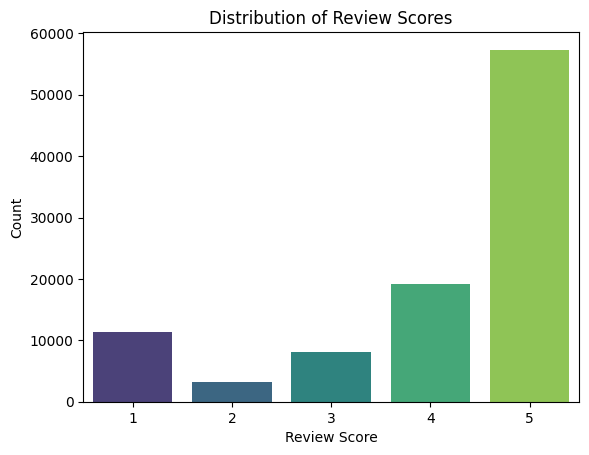

In [12]:
# Distribution of review scores
sns.countplot(data=order_reviews, x='review_score', palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

**Insight:**
- Mayoritas ulasan bernilai tinggi:
  - Skor ulasan 5 mendominasi distribusi, menunjukkan bahwa sebagian besar pelanggan memberikan ulasan yang sangat positif.
  - Skor ulasan 4 juga cukup tinggi, menunjukkan pengalaman yang memuaskan.

- Ulasan dengan skor rendah lebih jarang:

  - Skor ulasan 1 dan 2 lebih jarang dibandingkan skor tinggi, yang menunjukkan bahwa pelanggan yang merasa tidak puas relatif lebih sedikit.

- Indikasi kepuasan pelanggan yang baik:
  - Secara keseluruhan, distribusi ini menunjukkan bahwa kebanyakan pelanggan memiliki pengalaman positif dengan produk atau layanan yang mereka beli.

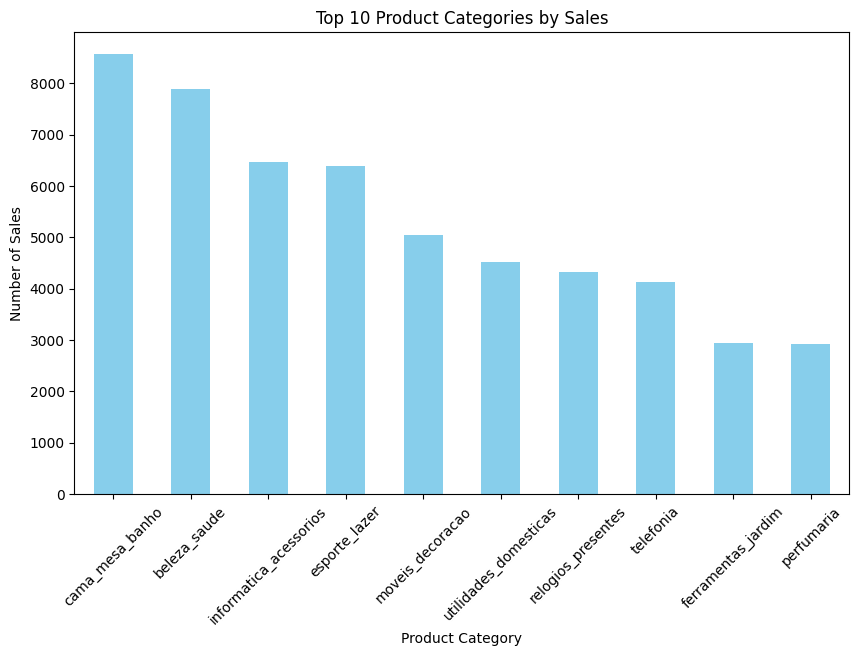

In [13]:
# Top 10 product categories by sales
product_sales = order_items.merge(products, on='product_id', how='inner')
category_sales = product_sales['product_category_name'].value_counts().head(10)
category_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Kategori terpopuler:

  - Cama_mesa_banho (tempat tidur, meja, dan kamar mandi) memiliki penjualan tertinggi, menunjukkan bahwa produk dalam kategori ini sangat diminati pelanggan.
  - Kategori beleza_saude (kesehatan dan kecantikan) berada di posisi kedua, menandakan pentingnya produk kesehatan dan kecantikan di pasar.

- Permintaan produk teknologi dan rekreasi:

  - Kategori informatica_acessorios (teknologi & aksesori) dan esporte_lazer (olahraga & rekreasi) menunjukkan tingkat penjualan yang signifikan, mencerminkan minat pelanggan terhadap teknologi dan produk gaya hidup.

- Kategori dekorasi dan hadiah:

  - Moveis_decoracao (mebel & dekorasi) dan relogios_presentes (jam tangan & hadiah) termasuk dalam kategori populer, yang mungkin mencerminkan kebutuhan akan produk rumah tangga dan hadiah.

- Kategori dengan permintaan lebih rendah dalam 10 besar:

  - Ferramentas_jardim (alat dan taman) dan perfumaria (parfum) menempati peringkat terendah dalam daftar ini, namun tetap masuk dalam 10 besar.

**Insight tambahan:**
- Data ini dapat digunakan untuk strategi pemasaran seperti mengalokasikan lebih banyak anggaran iklan untuk kategori dengan permintaan tinggi.
- Produk dalam kategori populer dapat diprioritaskan dalam pengelolaan inventaris atau promosi khusus untuk meningkatkan penjualan lebih lanjut.

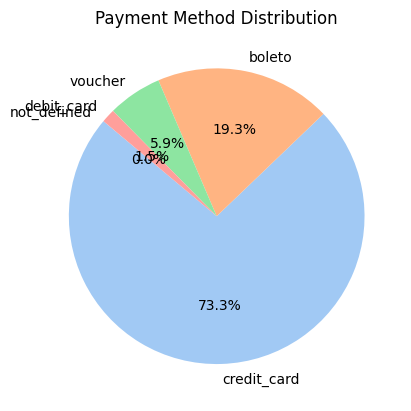

In [14]:
# Payment method distribution
payment_distribution = order_payments['payment_type'].value_counts()
payment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

**Insight:**
- Dominasi kartu kredit:

  - Metode pembayaran credit_card digunakan oleh mayoritas pelanggan (73.3%). Hal ini menunjukkan bahwa pelanggan lebih nyaman atau terbiasa menggunakan kartu kredit untuk bertransaksi online.
- Penggunaan boleto yang signifikan:

  - Metode pembayaran boleto (sejenis transfer bank di Brasil) berada di urutan kedua dengan 19.3%. Ini menunjukkan bahwa metode ini masih cukup populer, terutama di kalangan pelanggan yang mungkin tidak memiliki akses ke kartu kredit.
- Metode pembayaran lain:

  - Debit_card (5.9%) dan voucher (0.6%) memiliki penggunaan yang lebih rendah, menunjukkan preferensi yang lebih terbatas terhadap metode ini.
  - Not_defined (0.6%) mungkin mengindikasikan data yang tidak lengkap atau tidak tersedia terkait metode pembayaran.

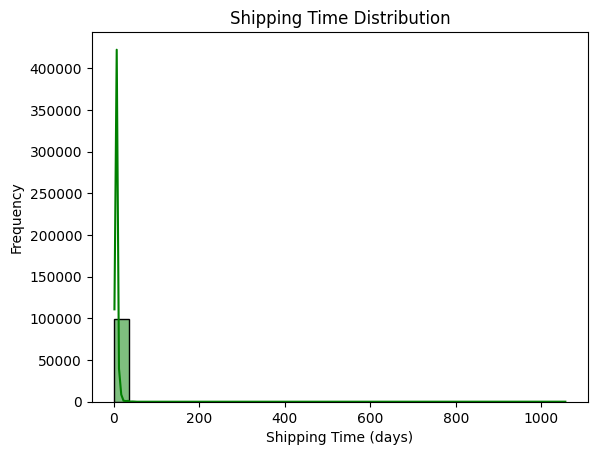

In [15]:
# Average shipping time analysis
q1_data['shipping_limit_date'] = pd.to_datetime(q1_data['shipping_limit_date'])
q1_data['order_purchase_timestamp'] = pd.to_datetime(q1_data['order_purchase_timestamp'])
q1_data['shipping_time'] = (q1_data['shipping_limit_date'] - q1_data['order_purchase_timestamp']).dt.days
sns.histplot(q1_data['shipping_time'], kde=True, color='green', bins=30)
plt.title('Shipping Time Distribution')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Distribusi Tidak Merata:

  - Sebagian besar pengiriman terjadi dalam waktu yang sangat singkat (mungkin dalam beberapa hari pertama). Hal ini terlihat dari puncak frekuensi yang sangat tinggi di awal sumbu x.
- Outlier:

  - Ada beberapa data yang menunjukkan waktu pengiriman yang sangat lama, hingga mendekati 1000 hari. Ini dapat disebabkan oleh kesalahan data, pengiriman ke lokasi yang sangat jauh, atau kendala operasional tertentu.
- Skewness (Kemiringan Data):

  - Distribusi ini sangat skewed ke kanan, yang berarti sebagian besar pengiriman terjadi dalam waktu yang cepat, tetapi ada ekor panjang (long tail) yang mencakup pengiriman dengan waktu lebih lama.

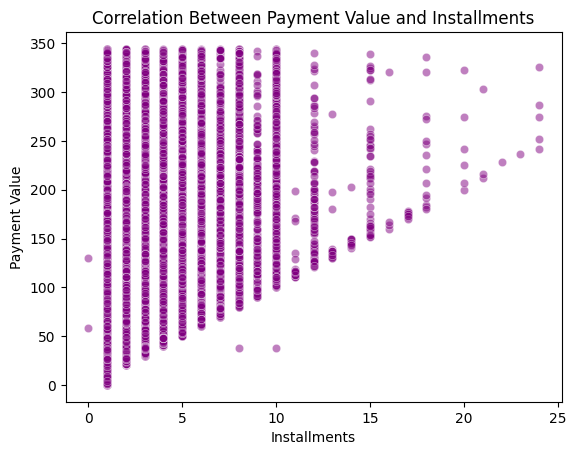

In [16]:
# Correlation between payment value and installments
sns.scatterplot(data=order_payments, x='payment_installments', y='payment_value', alpha=0.5, color='purple')
plt.title('Correlation Between Payment Value and Installments')
plt.xlabel('Installments')
plt.ylabel('Payment Value')
plt.show()

**Insight:**
- Polanya Terlihat Linier:

  - Terdapat tren yang menunjukkan bahwa semakin banyak jumlah cicilan, semakin tinggi nilai pembayaran yang terkait. Namun, pola ini tidak selalu konsisten karena beberapa titik terlihat menyebar di sekitar garis diagonal.
- Konsistensi di Awal Cicilan:

  - Pada jumlah cicilan yang rendah (sekitar 0-10), terdapat distribusi nilai pembayaran yang sangat rapat dan terstruktur. Hal ini mungkin menunjukkan bahwa pembayaran pada jumlah cicilan rendah lebih sering terjadi dan lebih terstandar.
- Variasi Nilai Pembayaran pada Cicilan Tinggi:

  - Pada cicilan yang lebih tinggi (15-25), nilai pembayaran cenderung lebih bervariasi. Hal ini bisa jadi karena perbedaan besar pembayaran tergantung pada produk atau jasa yang dibiayai.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola waktu pengiriman pesanan memengaruhi tingkat kepuasan pelanggan (berdasarkan ulasan pelanggan)?

<ipython-input-17-934a812675f8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=q1_data, x='shipping_time_category', y='review_score', palette='coolwarm')


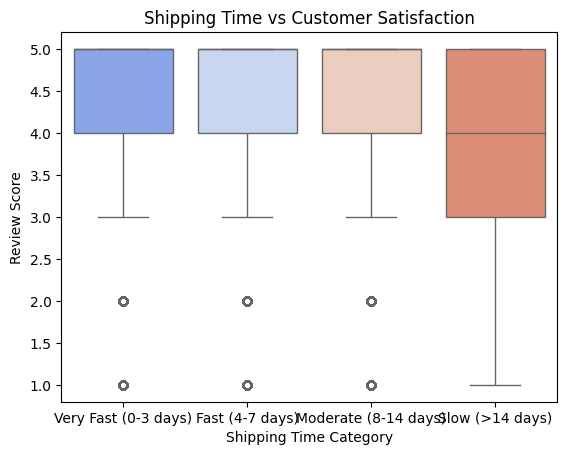

In [17]:
# Shipping time vs customer satisfaction
q1_data['shipping_time_category'] = pd.cut(q1_data['shipping_time'],
                                           bins=[-1, 3, 7, 14, float('inf')],
                                           labels=['Very Fast (0-3 days)', 'Fast (4-7 days)', 'Moderate (8-14 days)', 'Slow (>14 days)'])
sns.boxplot(data=q1_data, x='shipping_time_category', y='review_score', palette='coolwarm')
plt.title('Shipping Time vs Customer Satisfaction')
plt.xlabel('Shipping Time Category')
plt.ylabel('Review Score')
plt.show()

**Insight:**
- Kategori Sangat Cepat (0-3 hari):

  - Skor ulasan umumnya tinggi, dengan median mendekati 5.
Rentang skor sempit, menunjukkan bahwa pelanggan cenderung konsisten memberikan ulasan positif.

- Ada beberapa outlier (skor rendah), namun ini jarang terjadi.
Kategori Cepat (4-7 hari):

  - Median ulasan masih tinggi, sedikit di bawah kategori "Sangat Cepat".
Rentang ulasan sedikit lebih besar, tetapi secara keseluruhan masih menunjukkan kepuasan tinggi.
Outlier juga terlihat, menunjukkan adanya pelanggan yang kurang puas.
- Kategori Sedang (8-14 hari):

  - Median tetap tinggi, mirip dengan kategori sebelumnya.
Rentang ulasan lebih luas dibandingkan kategori "Sangat Cepat" atau "Cepat".
Beberapa outlier masih ada, menunjukkan ketidakpuasan sebagian pelanggan.
- Kategori Lambat (>14 hari):

  - Median ulasan menurun dibandingkan kategori lainnya, mendekati skor 4.
Rentang ulasan jauh lebih besar, dengan variasi signifikan antara pelanggan yang puas dan yang tidak puas.
Banyak outlier dengan skor rendah, menunjukkan lebih banyak pelanggan yang sangat tidak puas dengan waktu pengiriman ini.



<ipython-input-18-021945d756ab>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_review_by_shipping = q1_data.groupby('shipping_time_category')['review_score'].mean().sort_index()


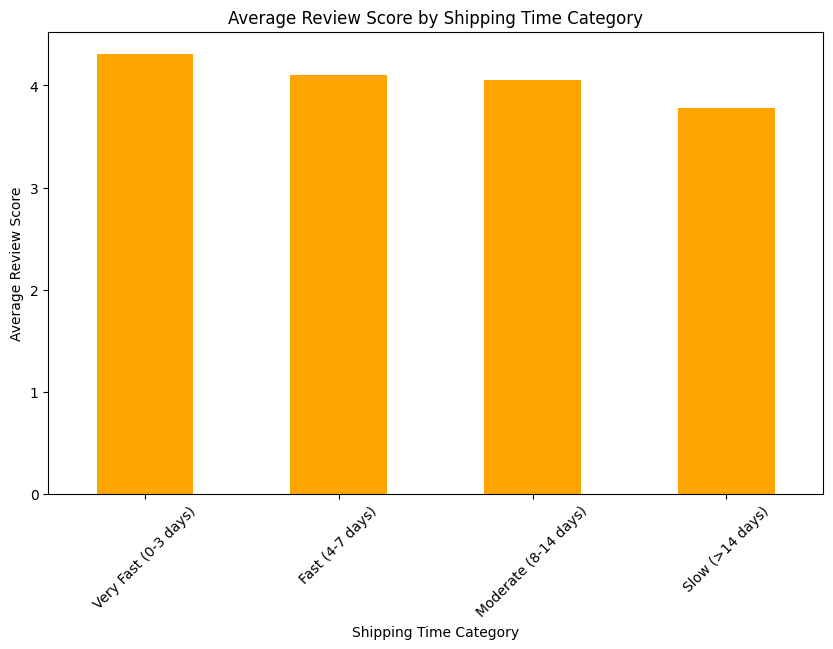

In [18]:
# Average review score by shipping time category
avg_review_by_shipping = q1_data.groupby('shipping_time_category')['review_score'].mean().sort_index()
avg_review_by_shipping.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Review Score by Shipping Time Category')
plt.xlabel('Shipping Time Category')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Apakah terdapat hubungan antara kategori produk dengan metode pembayaran yang paling sering digunakan?

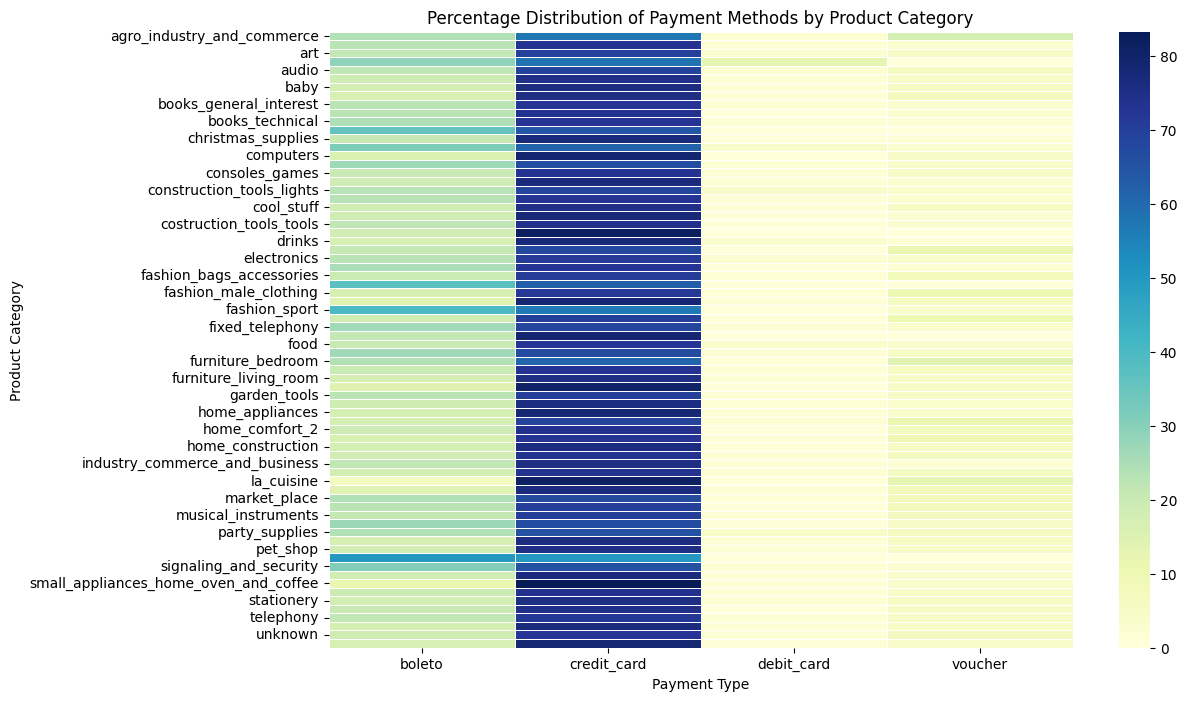

In [19]:
# Product category vs payment method
q2_data['product_category_name_english'] = q2_data['product_category_name_english'].fillna('unknown')
payment_category_data = q2_data.groupby(['product_category_name_english', 'payment_type']).size().reset_index(name='count')
payment_category_pivot = payment_category_data.pivot(index='product_category_name_english', columns='payment_type', values='count').fillna(0)

# Normalize by row to show percentage distribution
payment_category_pivot_normalized = payment_category_pivot.div(payment_category_pivot.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(payment_category_pivot_normalized, cmap='YlGnBu', annot=False, cbar=True, linewidths=0.5)
plt.title('Percentage Distribution of Payment Methods by Product Category')
plt.xlabel('Payment Type')
plt.ylabel('Product Category')
plt.show()

**Insight:**
- Metode Pembayaran yang Dominan:

  - Credit Card adalah metode pembayaran yang paling sering digunakan di hampir semua kategori produk. Warna biru gelap yang dominan pada grafik menunjukkan persentase penggunaannya yang tinggi.
  - Boleto (sistem pembayaran berbasis tiket di Brasil) adalah metode pembayaran kedua yang sering digunakan di sebagian besar kategori, tetapi persentasenya lebih kecil dibandingkan dengan credit card.
  - Debit Card dan Voucher hanya memiliki kontribusi yang sangat kecil atau hampir tidak ada di banyak kategori produk.

- Kategori dengan Distribusi Metode Pembayaran yang Berbeda:

  - Untuk kategori seperti food dan pet_shop, metode pembayaran boleto memiliki persentase yang lebih tinggi dibandingkan beberapa kategori lainnya, meskipun credit card masih mendominasi.
  - Party_supplies dan beberapa kategori terkait dekorasi memiliki distribusi metode pembayaran yang sedikit lebih beragam dibandingkan kategori lainnya.

- Kategori Produk yang Didominasi Credit Card:

  - Kategori seperti electronics, furniture_bedroom, dan telephony menunjukkan dominasi yang sangat besar dari penggunaan credit card.
- Kategori dengan Penggunaan Boleto yang Signifikan:

  - Kategori seperti construction_tools_tools, garden_tools, dan home_construction menunjukkan penggunaan boleto yang relatif lebih tinggi dibandingkan kategori seperti fashion_sport atau audio.

## Conclusion

- Conclusion pertanyaan 1
  - Waktu pengiriman yang lebih cepat (0-7 hari) cenderung memberikan tingkat kepuasan yang lebih tinggi, dengan ulasan yang konsisten positif.
Ketika waktu pengiriman menjadi lebih lambat (>14 hari), kepuasan pelanggan cenderung menurun, dengan ulasan yang lebih bervariasi dan lebih banyak skor rendah.
Mengurangi waktu pengiriman atau memberikan informasi yang jelas tentang estimasi pengiriman dapat membantu meningkatkan kepuasan pelanggan.
- Conclusion pertanyaan 2
  - Credit Card adalah metode pembayaran yang paling populer untuk hampir semua kategori produk.
Boleto tetap menjadi alternatif penting, terutama untuk kategori produk tertentu seperti konstruksi dan kebutuhan rumah tangga.
Debit Card dan Voucher memiliki penggunaan yang sangat terbatas, sehingga mungkin tidak menjadi prioritas dalam strategi pembayaran.
Strategi pemasaran dan penawaran metode pembayaran dapat disesuaikan berdasarkan kategori produk untuk meningkatkan pengalaman pelanggan.

In [20]:
all_df = pd.concat([order_items, order_reviews, orders, order_payments, customers, products, sellers, product_category_translation], axis=0)

In [21]:
all_df.to_csv("all_data.csv", index=False)